In [1]:
import pandas as pd
df = pd.read_csv('/content/Flipkart_mobile_brands_scraped_data.csv', usecols=['Brand','Memory'])
df['Memory'] = df['Memory'].str.replace(' ','')
df['Memory'] = df['Memory'].str.replace('512MB','0.5GB')
df = df.dropna()
df = df.drop_duplicates()
df

,Brand,Memory
0,OPPO,4GB
2,OPPO,6GB
7,OPPO,3GB
15,OPPO,8GB
21,OPPO,2GB
...,...,...
2483,Xiaomi,8GB
2486,Xiaomi,6GB
2513,Xiaomi,4GB
2522,Xiaomi,2GB


In [2]:
import networkx as nx
from networkx.algorithms import bipartite
B = nx.Graph()
Brand = df['Brand']
Memory = df['Memory']
print("Brand ",Brand.nunique())
print("Memory",Memory.nunique())
print("Số cạnh", len(df))

Brand  16
Memory 28
Số cạnh 122


In [3]:
for index, row in df.iterrows():
  B.add_edge(row['Brand'], row['Memory'],weight=1)
B.add_nodes_from(Memory,bipartite = 0)
B.add_nodes_from(Brand,bipartite = 1)

<Figure size 864x864 with 0 Axes>

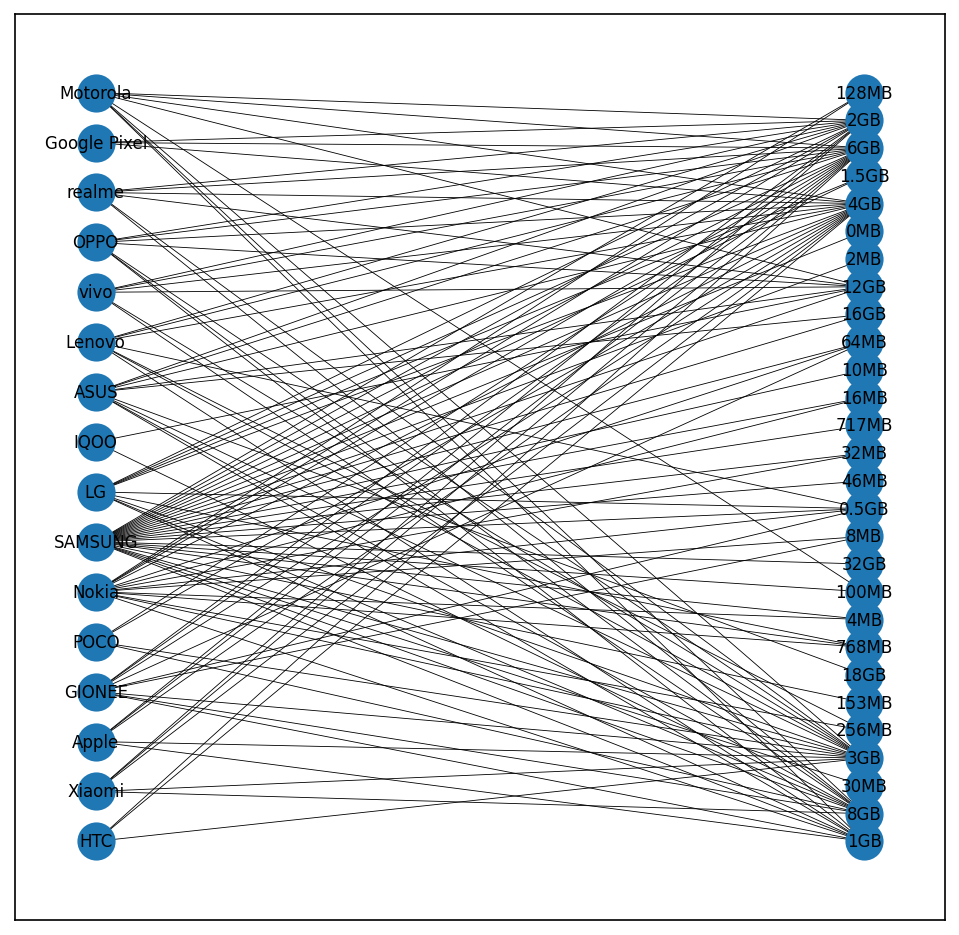

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1, figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B,Brand),font_size=8,width=0.4)

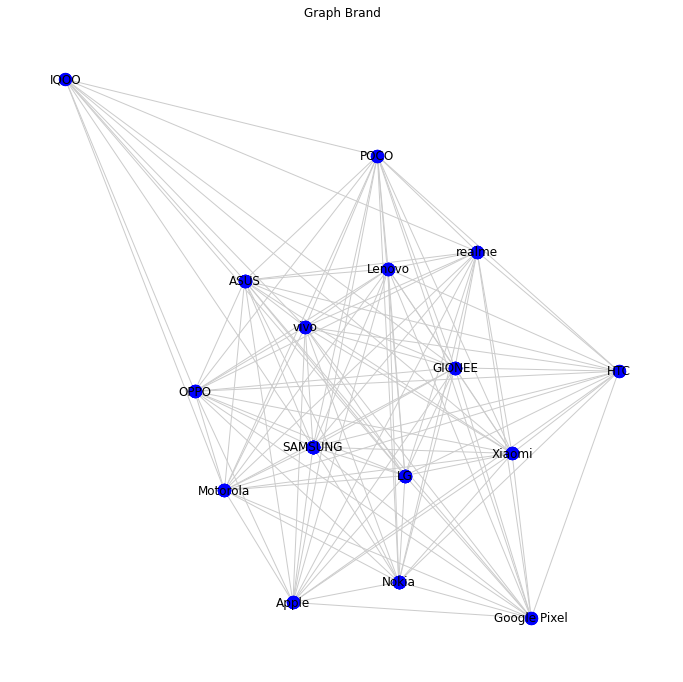

In [5]:
G = bipartite.weighted_projected_graph(B,Brand)
plt.figure(figsize=(12,12))

layout = nx.spring_layout(G)

nx.draw_networkx_nodes(G,
                       layout,
                       nodelist=Brand,
                       node_size=150,
                       node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color="#cccccc")
node_labels = dict(zip(Brand, Brand))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')

plt.title("Graph Brand")

plt.show()

In [6]:
labels = nx.get_edge_attributes(G,'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
  df2 =df2.append({'source':key[0],'target':key[1],'weight':value}, ignore_index=True)
df2.to_csv(r'data_for_gephi.csv', index = False, header=True)

### Page rank

In [7]:
page_rank = nx.pagerank(G)
for node in sorted(page_rank, key=page_rank.get, reverse=True):
  print(node, page_rank[node])

SAMSUNG 0.08531075379207942
ASUS 0.0739418210069697
Motorola 0.0739418210069697
GIONEE 0.07354263189259955
LG 0.07353168685902728
OPPO 0.07314214956945492
Nokia 0.07058887693220424
realme 0.06661806279213572
vivo 0.06661806279213572
Lenovo 0.06334485836314034
Xiaomi 0.06136588055369238
Apple 0.059301305555650496
POCO 0.05146043907195641
HTC 0.04289833994110801
Google Pixel 0.04203297592229822
IQOO 0.022360333948577914


## Closeness centrality

In [8]:
closeness_centraliy = nx.closeness_centrality(G)
for node in sorted(closeness_centraliy, key=closeness_centraliy.get, reverse=True):
  print(node, closeness_centraliy[node])

OPPO 1.0
LG 1.0
ASUS 1.0
realme 1.0
GIONEE 1.0
SAMSUNG 1.0
Motorola 1.0
POCO 1.0
vivo 1.0
Xiaomi 1.0
HTC 0.9375
Google Pixel 0.9375
Nokia 0.9375
Apple 0.9375
Lenovo 0.9375
IQOO 0.75


## Betweenness centraliy

In [9]:
# 
betweenness_centraliy = nx.betweenness_centrality(G)
for node in sorted(betweenness_centraliy, key=betweenness_centraliy.get, reverse=True):
  print(node, betweenness_centraliy[node])

OPPO 0.0047619047619047615
LG 0.0047619047619047615
ASUS 0.0047619047619047615
realme 0.0047619047619047615
GIONEE 0.0047619047619047615
SAMSUNG 0.0047619047619047615
Motorola 0.0047619047619047615
POCO 0.0047619047619047615
vivo 0.0047619047619047615
Xiaomi 0.0047619047619047615
HTC 0.0
IQOO 0.0
Google Pixel 0.0
Nokia 0.0
Apple 0.0
Lenovo 0.0


# **Thuật toán phân cụm**

## Louvain

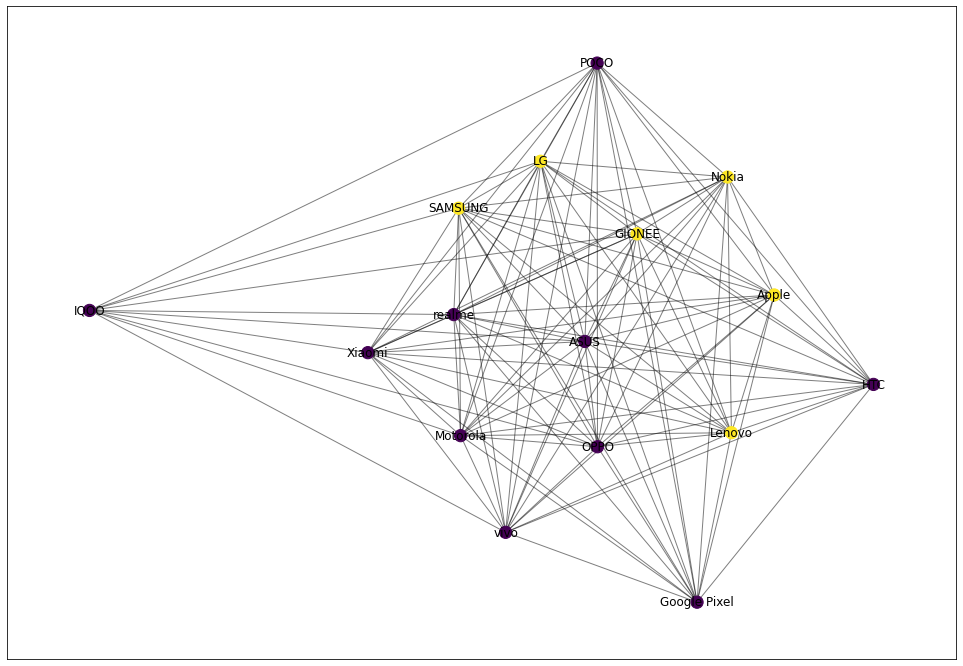

In [10]:
import matplotlib.cm as cm
import matplotlib
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 12))

partition = community_louvain.best_partition(G)

pos = nx.spring_layout(G)

cmap= cm.get_cmap('viridis', max(partition.values()) +1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=150,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()

In [11]:
import numpy as np
values = list(partition.values())

print('Số cụm', len(np.unique(values)))

for i in range(len(np.unique(values))):
  print("-- Cụm ", i+1, " --")
  for name, k in partition.items():
    if k ==i:
      print(name)

Số cụm 2
-- Cụm  1  --
OPPO
HTC
IQOO
Google Pixel
ASUS
realme
Motorola
POCO
vivo
Xiaomi
-- Cụm  2  --
LG
GIONEE
Nokia
Apple
SAMSUNG
Lenovo


In [12]:
List0 = []
for name, k in partition.items():
  if k==0:
    print(name)
    List0.append(name)
Nhom0 = df.query("Brand in @List0")
Nhom0

OPPO
HTC
IQOO
Google Pixel
ASUS
realme
Motorola
POCO
vivo
Xiaomi


,Brand,Memory
0,OPPO,4GB
2,OPPO,6GB
7,OPPO,3GB
15,OPPO,8GB
21,OPPO,2GB
48,OPPO,12GB
115,OPPO,1GB
244,HTC,6GB
245,HTC,3GB
246,HTC,4GB


In [14]:
List1 = []
for name, k in partition.items():
  if k==1:
    print(name)
    List1.append(name)
Nhom1 = df.query("Brand in @List1")
Nhom1

LG
GIONEE
Nokia
Apple
SAMSUNG
Lenovo


,Brand,Memory
278,LG,3GB
279,LG,6GB
281,LG,1GB
282,LG,4GB
289,LG,2GB
...,...,...
2183,Lenovo,1GB
2186,Lenovo,256MB
2199,Lenovo,4GB
2251,Lenovo,0.5GB


In [15]:
df.to_excel (r'Louvain_Cum.xlsx', sheet_name='pah_wikp_combo', index = False, header=True)
with pd.ExcelWriter('Louvain_Cum.xlsx',
                    mode='a') as writer:  
    Nhom0.to_excel(writer, sheet_name='Louvain_Nhom1',index = False, header=True)                
    Nhom1.to_excel(writer, sheet_name='Louvain_Nhom2',index = False, header=True)

## Girvan Newman

[['Xiaomi', 'HTC', 'Apple', 'GIONEE', 'POCO', 'Nokia', 'SAMSUNG', 'vivo', 'LG', 'ASUS', 'Lenovo', 'OPPO', 'realme', 'Google Pixel', 'Motorola'], ['IQOO']]


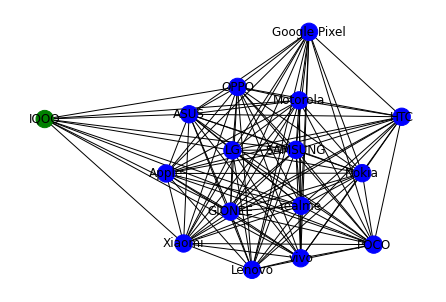

In [16]:
from networkx.algorithms.community.centrality import girvan_newman

communities = girvan_newman(G)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [19]:
ListGV01 = ['Xiaomi', 'HTC', 'Apple', 'GIONEE', 'POCO', 'Nokia', 'SAMSUNG', 'vivo', 'LG', 'ASUS', 'Lenovo', 'OPPO', 'realme', 'Google Pixel', 'Motorola']
ListGV02 = ['IQOO']

Group01 = df.query("Brand in @ListGV01")
Group02 = df.query("Brand in @ListGV02")

In [20]:
df.to_excel (r'GirvanNewman.xlsx', sheet_name='Data', index = False, header=True)
with pd.ExcelWriter('GirvanNewman.xlsx',
                    mode='a') as writer:  
    Group01.to_excel(writer, sheet_name='Girvan_Group01',index = False, header=True)                
    Group02.to_excel(writer, sheet_name='Girvan_Group02',index = False, header=True)

## KMeans

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.cluster import KMeans


In [22]:
df_Copy = df.copy()
df.columns = ['N_Memory' if x=='Memory' else 'N_Brand' if x=='Brand' else x for x in df.columns]
df

,N_Brand,N_Memory
0,OPPO,4GB
2,OPPO,6GB
7,OPPO,3GB
15,OPPO,8GB
21,OPPO,2GB
...,...,...
2483,Xiaomi,8GB
2486,Xiaomi,6GB
2513,Xiaomi,4GB
2522,Xiaomi,2GB


In [23]:
df_Copy

,Brand,Memory
0,OPPO,4GB
2,OPPO,6GB
7,OPPO,3GB
15,OPPO,8GB
21,OPPO,2GB
...,...,...
2483,Xiaomi,8GB
2486,Xiaomi,6GB
2513,Xiaomi,4GB
2522,Xiaomi,2GB


In [24]:
def Label_enc(feat):
    LabelE = LabelEncoder()
    LabelE.fit(feat)
    print(feat.name,LabelE.classes_)
    return LabelE.transform(feat)

In [25]:
for col in df.columns:
    df[str(col)] = Label_enc(df[str(col)])

N_Brand ['ASUS' 'Apple' 'GIONEE' 'Google Pixel' 'HTC' 'IQOO' 'LG' 'Lenovo'
 'Motorola' 'Nokia' 'OPPO' 'POCO' 'SAMSUNG' 'Xiaomi' 'realme' 'vivo']
N_Memory ['0.5GB' '0MB' '1.5GB' '100MB' '10MB' '128MB' '12GB' '153MB' '16GB' '16MB'
 '18GB' '1GB' '256MB' '2GB' '2MB' '30MB' '32GB' '32MB' '3GB' '46MB' '4GB'
 '4MB' '64MB' '6GB' '717MB' '768MB' '8GB' '8MB']


In [26]:
df.head()

,N_Brand,N_Memory
0,10,20
2,10,23
7,10,18
15,10,26
21,10,13


In [27]:
df02 = pd.concat([df_Copy, df],axis=1)

In [28]:
df02

,Brand,Memory,N_Brand,N_Memory
0,OPPO,4GB,10,20
2,OPPO,6GB,10,23
7,OPPO,3GB,10,18
15,OPPO,8GB,10,26
21,OPPO,2GB,10,13
...,...,...,...,...
2483,Xiaomi,8GB,13,26
2486,Xiaomi,6GB,13,23
2513,Xiaomi,4GB,13,20
2522,Xiaomi,2GB,13,13


In [29]:
X = df02[['N_Memory', 'N_Brand']].iloc[:,:].values
inertia=[]
for n in range (1,11):
    algorithm = KMeans(n_clusters =n, init='random')
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

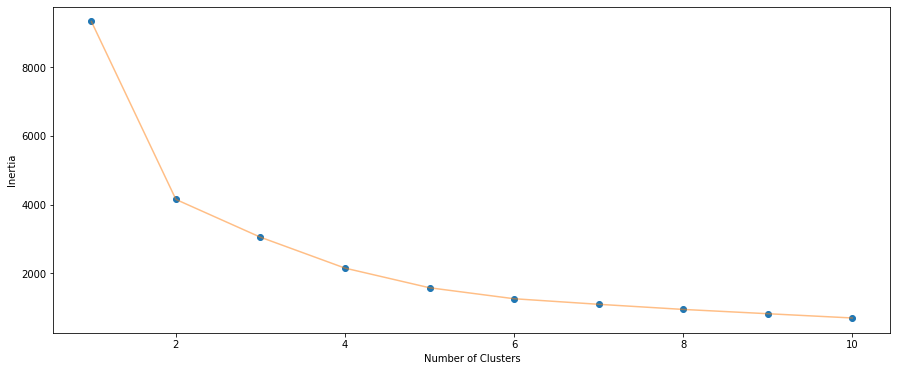

In [30]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

**Từ biểu đồ trên có thể xác nhận, số cụm tối ưu là 2 (k=2)**


In [31]:
algorithm = KMeans(n_clusters =2, init='random')
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

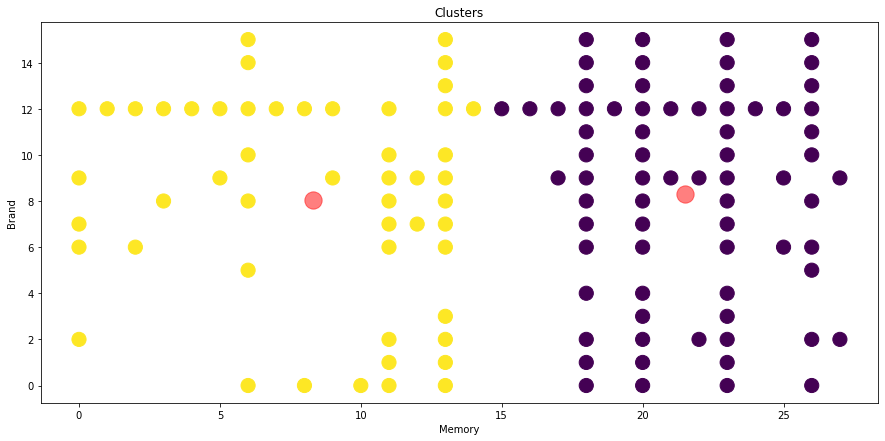

In [32]:
#Biểu diễn kết quả gom cụm
plt.figure(1, figsize = (15,7))
plt.clf()
plt.scatter(x='N_Memory', y='N_Brand', data=df02, s=200, c=labels1)
plt.scatter(centroids1[:,0], centroids1[:,1], s=300, c='red', alpha=0.5)
plt.xlabel('Memory'), plt.ylabel('Brand')
plt.title('Clusters')
plt.show()

In [33]:
df02['Clusters'] = algorithm.labels_

df02.to_excel (r'Kmean.xlsx', sheet_name='cluster', index = False, header=True)

Groupkmean0 = df02.query("Clusters == 0")
Groupkmean1 = df02.query("Clusters == 1")
Groupkmean2 = df02.query("Clusters == 2")

with pd.ExcelWriter('Kmean.xlsx',
                    mode='a') as writer:  
    Groupkmean0.to_excel(writer, sheet_name='cluster0',index = False, header=True)                
    Groupkmean1.to_excel(writer, sheet_name='cluster1',index = False, header=True)
    Groupkmean2.to_excel(writer, sheet_name='cluster2',index = False, header=True)


In [34]:
Groupkmean0

,Brand,Memory,N_Brand,N_Memory,Clusters
0,OPPO,4GB,10,20,0
2,OPPO,6GB,10,23,0
7,OPPO,3GB,10,18,0
15,OPPO,8GB,10,26,0
244,HTC,6GB,4,23,0
...,...,...,...,...,...
2437,vivo,4GB,15,20,0
2483,Xiaomi,8GB,13,26,0
2486,Xiaomi,6GB,13,23,0
2513,Xiaomi,4GB,13,20,0


In [35]:
Groupkmean1

,Brand,Memory,N_Brand,N_Memory,Clusters
21,OPPO,2GB,10,13,1
48,OPPO,12GB,10,6,1
115,OPPO,1GB,10,11,1
253,IQOO,12GB,5,6,1
281,LG,1GB,6,11,1
289,LG,2GB,6,13,1
311,Google Pixel,2GB,3,13,1
322,LG,0.5GB,6,0,1
347,LG,1.5GB,6,2,1
383,ASUS,12GB,0,6,1


In [36]:
Groupkmean2

,Brand,Memory,N_Brand,N_Memory,Clusters
